In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import xgboost as xg

# 

In [2]:

df = pd.read_csv('/Users/marinelafargue/Desktop/projet calorie/data/df_encode_complete_OK.csv')

In [3]:
df.head(2)

,Unnamed: 0,age,height,weight,duration,heart_rate,body_temp,calorie,female,male,Height_meters,calculated_IMC
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0,0,1,1.90,26.038781
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0,1,0,1.66,21.773842


In [4]:
# Define the X (input) and y (target) features
X = df.drop(["calorie","Unnamed: 0", "weight","female","male", "height", "duration" ,"Height_meters"], axis=1)
#X = df.drop(["calorie","Unnamed: 0", "weight","female","male", "height", "duration" ,"Height_meters", "calculated_IMC", 'age', 'body_temp' ], axis=1)

y = df["calorie"]

In [5]:
X[0:1]

,age,heart_rate,body_temp,calculated_IMC
0,68,105.0,40.8,26.038781


In [6]:
test_size = 0.33
seed = 300
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [7]:
X_train.head(2)

,age,heart_rate,body_temp,calculated_IMC
646,32,110.0,40.9,24.989588
11946,35,97.0,39.6,23.306680


>cart1 -30.855 (0.661)
>cart2 -21.245 (0.422)
>cart3 -16.997 (0.407)
>cart4 -15.018 (0.398)
>cart5 -13.688 (0.435)
>voting -16.828 (0.361)


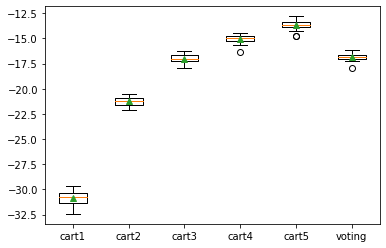

In [8]:

#  comparer l'ensemble de vote à chaque modèle autonome pour la régression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot
 
# obtenir le jeu de données
def get_dataset():
	X, y = make_regression(n_samples=1000, n_features=4, n_informative=15, noise=0.1, random_state=1)
	return X, y
 
# obtenir un ensemble de modèles votants
def get_voting():
	# définir les modèles de base
	models = list()
	models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
	models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
	models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
	models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
	models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
	# définir l'ensemble de vote
	ensemble = VotingRegressor(estimators=models)
	return ensemble
 
# obtenir une liste de modèles à évaluer
def get_models():
	models = dict()
	models['cart1'] = DecisionTreeRegressor(max_depth=1)
	models['cart2'] = DecisionTreeRegressor(max_depth=2)
	models['cart3'] = DecisionTreeRegressor(max_depth=3)
	models['cart4'] = DecisionTreeRegressor(max_depth=4)
	models['cart5'] = DecisionTreeRegressor(max_depth=5)
	models['voting'] = get_voting()
	return models
 
# évaluer un modèle donné en utilisant la validation croisée
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# obtenir les modèles à évaluer
models = get_models()
# évaluer les modèles et stocker les résultats
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [9]:
# faire une prédiction avec un ensemble de vote
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor

# définir le jeu de données
X_train, y_train = make_regression(n_samples=1000, n_features=4, n_informative=15, noise=0.1, random_state=1)

# définir les modèles de base

models = list()
models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
models.append(('cart5', DecisionTreeRegressor(max_depth=5)))

# définir l'ensemble de vote
ensemble = VotingRegressor(estimators=models)

# ajuster le modèle sur toutes les données disponibles
ensemble.fit(X_train, y_train)

# Faire une prédiction pour un exemple de la ligne 1
yhat = ensemble.predict(X[0:1])

In [10]:
print('Predicted Value: %.3f' % (yhat))

Predicted Value: 220.935


In [11]:
# Predict the model
pred = ensemble.predict(X_test)

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  145.458671


In [14]:
from sklearn.metrics import r2_score


score_R2 = ensemble.score(X_train, y_train)

In [15]:
score_R2

0.7400416372329539